<a href="https://colab.research.google.com/github/usmankhawar22/Machine-Learning/blob/master/Lab_8_UK_208775_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 14_monks-problems-1.csv to 14_monks-problems-1.csv


In [6]:
import pandas as pd

dataframe = pd.read_csv('14_monks-problems-1.csv', delimiter = ';')
dataframe.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,label
0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1
1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1
2,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1
3,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1


In [16]:
dataframe.shape

(432, 18)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

X = dataframe.drop(columns=['label'])

y = dataframe[['label']]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
model=gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [18]:
trainAcc = accuracy_score(y_train, gnb.predict(X_train))
testAcc = accuracy_score(y_test, gnb.predict(X_test))
print('Training accuracy of Naive Bayes:', trainAcc*100)
print('Test accuracy of Naive Bayes:', testAcc*100)

Training accuracy of Naive Bayes: 74.78260869565217
Test accuracy of Naive Bayes: 75.86206896551724


#Decision tree classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
trainingAcc = accuracy_score(y_train, clf.predict(X_train))
testingAcc = accuracy_score(y_test, clf.predict(X_test))
print('Training accuracy of Decision Tree:', trainingAcc*100)
print('Test accuracy of Decision Tree:', testingAcc*100)

Training accuracy of Decision Tree: 100.0
Test accuracy of Decision Tree: 97.70114942528735


#printing decision tree

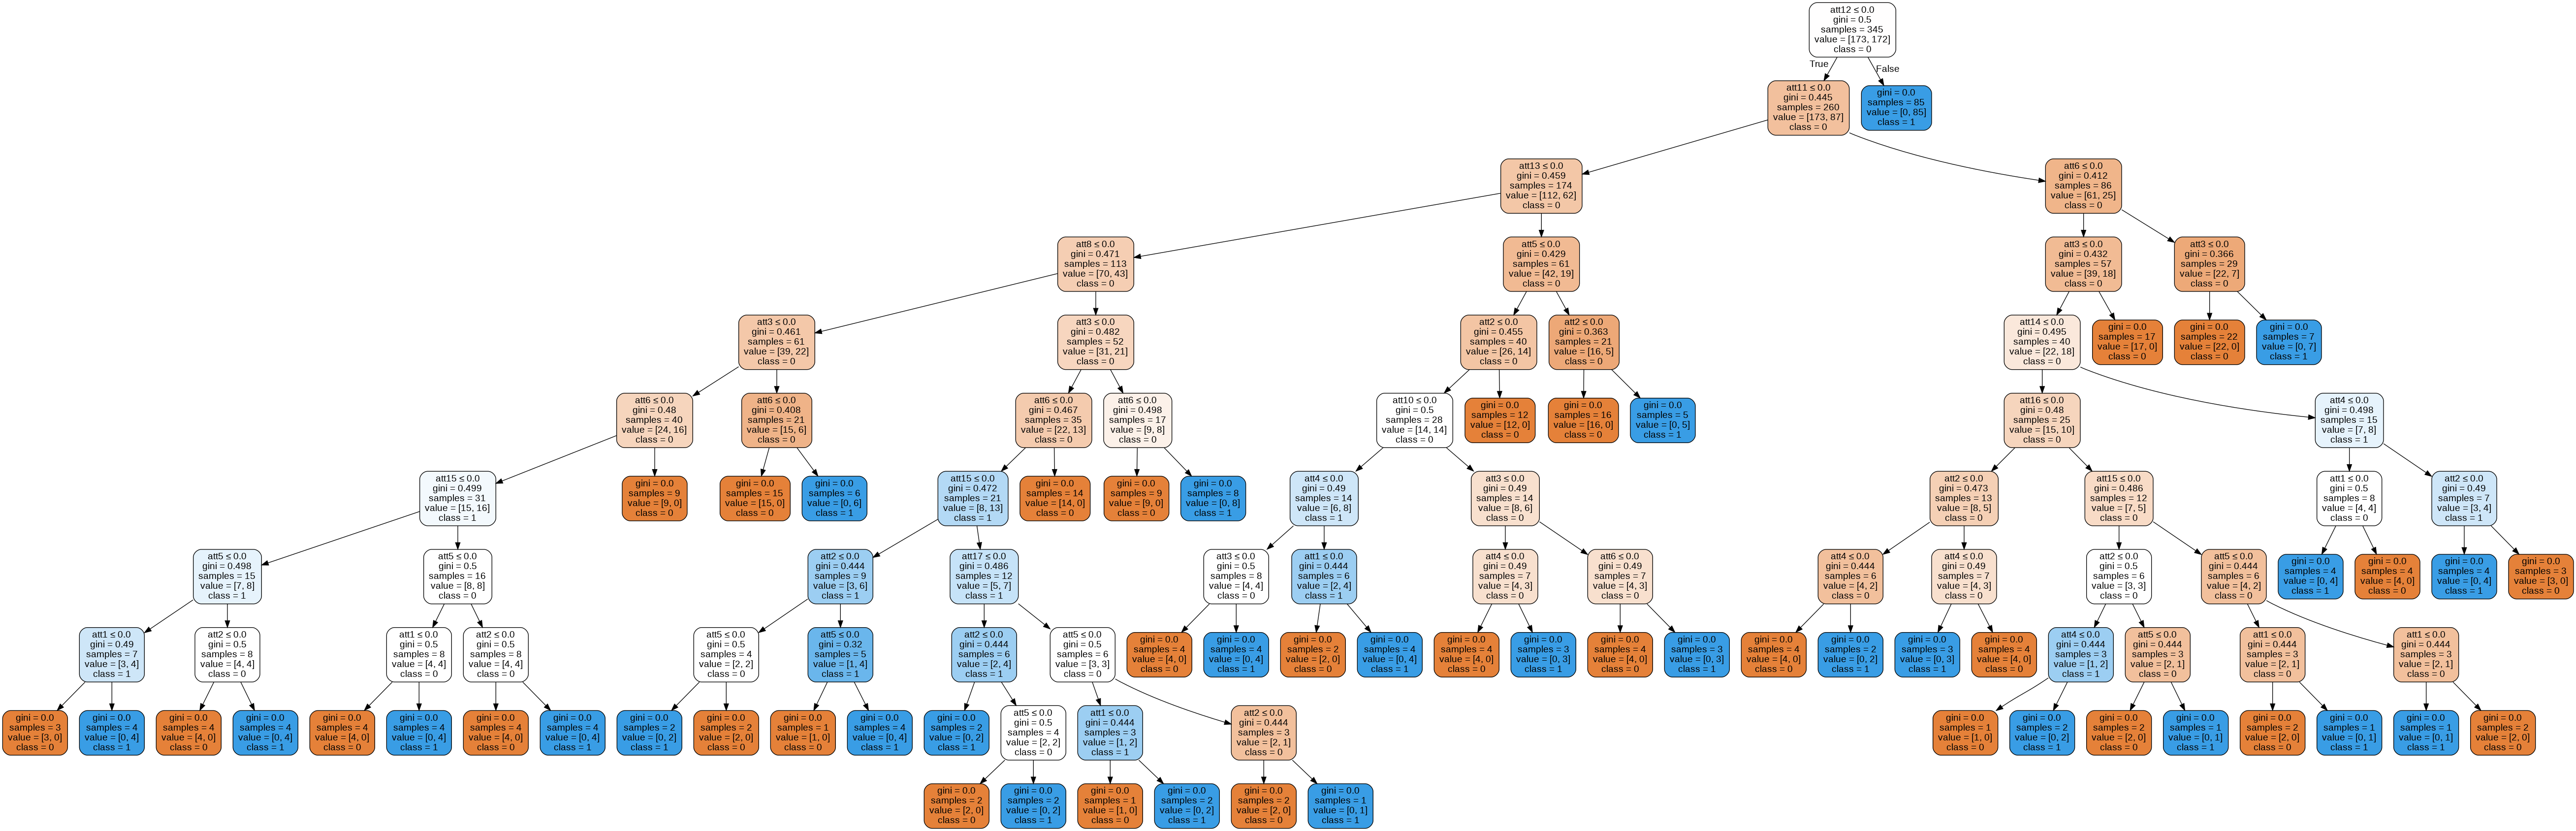

In [25]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image

features = dataframe.columns[:-1].tolist()
dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0', '1'], # the target names.
 feature_names=features, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

Source:
https://towardsdatascience.com/how-to-visualize-a-decision-tree-in-5-steps-19781b28ffe2